# Global Metal: Exploratory Data Analysis
## Data Loading & Initial Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("Libraries loaded successfully")

Libraries loaded successfully


In [2]:
# Update the filename to match what you downloaded
df = pd.read_csv("../data/metal_bands.csv", low_memory=False)
print(f"Dataset shape: {df.shape}")
df.columns.tolist()

Dataset shape: (183397, 7)


['Band ID', 'Name', 'URL', 'Country', 'Genre', 'Status', 'Photo_URL']

In [3]:
df.head()

,Band ID,Name,URL,Country,Genre,Status,Photo_URL
0,3540442600,A // Solution,https://www.metal-archives.com/bands/A_--_Solu...,United States,Crust Punk/Thrash Metal,Split-up,NaN
1,3540525193,A Black Cold Diamond,https://www.metal-archives.com/bands/A_Black_C...,Colombia,Heavy/Doom Metal,Active,https://www.metal-archives.com/images/3/5/4/0/...
2,3540473101,A Billion Limbs,https://www.metal-archives.com/bands/A_Billion...,United Kingdom,Groove Metal/Deathcore,Active,NaN
3,3540535978,A Band Named Jon,https://www.metal-archives.com/bands/A_Band_Na...,United States,Brutal Death Metal/Grindcore,Active,https://www.metal-archives.com/images/3/5/4/0/...
4,3540352307,A Balance of Power,https://www.metal-archives.com/bands/A_Balance...,United States,Melodic Death Metal/Metalcore,Active,https://www.metal-archives.com/images/3/5/4/0/...


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 183397 entries, 0 to 183396
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Band ID    183397 non-null  object
 1   Name       183394 non-null  str   
 2   URL        183397 non-null  str   
 3   Country    183397 non-null  str   
 4   Genre      183397 non-null  str   
 5   Status     183397 non-null  str   
 6   Photo_URL  129481 non-null  str   
dtypes: object(1), str(6)
memory usage: 9.8+ MB


In [5]:
df.isnull().sum()

Band ID          0
Name             3
URL              0
Country          0
Genre            0
Status           0
Photo_URL    53916
dtype: int64

In [6]:
print(f"Unique countries: {df['Country'].nunique()}")
print(f"Unique genres: {df['Genre'].nunique()}")
print(f"Unique statuses: {df['Status'].nunique()}")
print(f"\nStatus values:\n{df['Status'].value_counts()}")

Unique countries: 157
Unique genres: 11512
Unique statuses: 6

Status values:
Status
Active          101317
Split-up         55254
Unknown          15579
Changed name      7273
On hold           3946
Disputed            28
Name: count, dtype: int64


## Data Cleaning

In [7]:
# Drop rows with missing band names
df = df.dropna(subset=["Name"])
print(f"Rows after cleaning: {df.shape[0]}")

# Drop columns we won't need for analysis
df = df.drop(columns=["Band ID", "URL", "Photo_URL"])
df.head()

Rows after cleaning: 183394


,Name,Country,Genre,Status
0,A // Solution,United States,Crust Punk/Thrash Metal,Split-up
1,A Black Cold Diamond,Colombia,Heavy/Doom Metal,Active
2,A Billion Limbs,United Kingdom,Groove Metal/Deathcore,Active
3,A Band Named Jon,United States,Brutal Death Metal/Grindcore,Active
4,A Balance of Power,United States,Melodic Death Metal/Metalcore,Active


## Global Distribution of Metal Bands

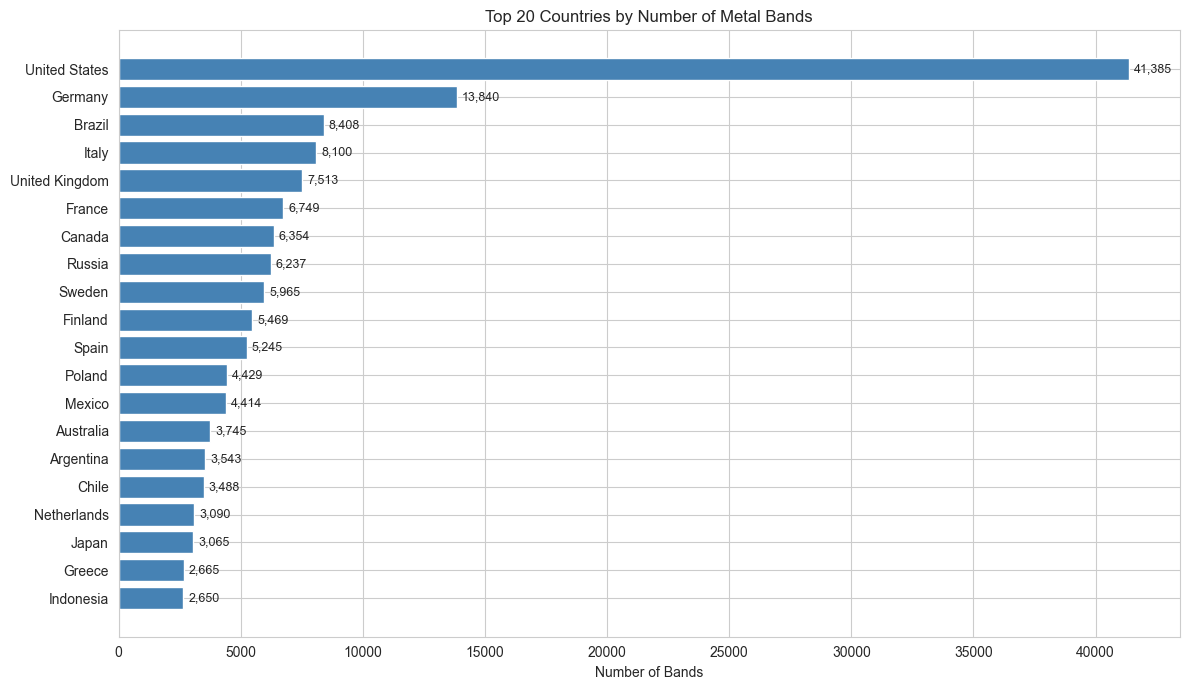

In [9]:
# Top 20 countries by number of bands
country_counts = df["Country"].value_counts().head(20)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(country_counts.index[::-1], country_counts.values[::-1], color="steelblue")
ax.set_xlabel("Number of Bands")
ax.set_title("Top 20 Countries by Number of Metal Bands")

# Add count labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 200, bar.get_y() + bar.get_height()/2, 
            f"{int(width):,}", va="center", fontsize=9)

plt.tight_layout()
plt.savefig("../outputs/top_20_countries.png", dpi=150, bbox_inches="tight")
plt.show()

## Southeast Asia Metal Scene

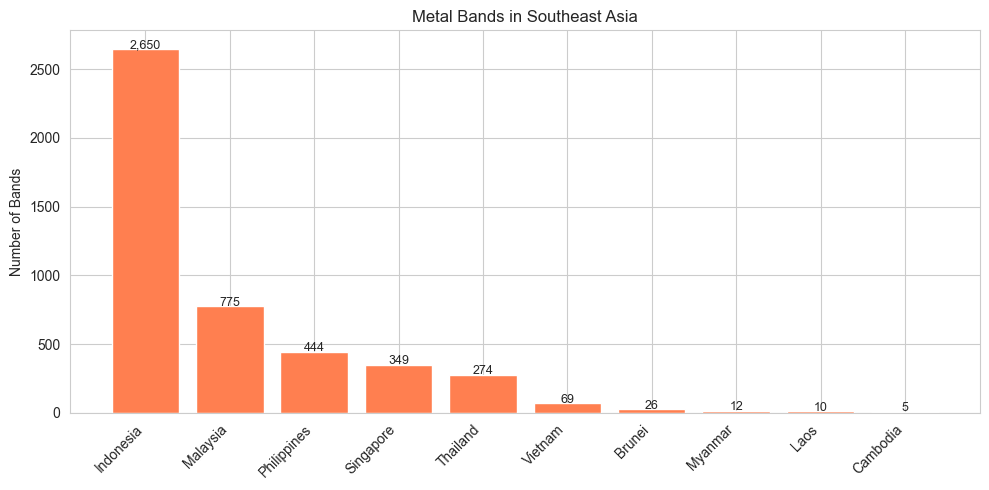

In [10]:
sea_countries = ["Malaysia", "Indonesia", "Singapore", "Thailand", 
                 "Philippines", "Vietnam", "Myanmar", "Cambodia", 
                 "Laos", "Brunei"]

df_sea = df[df["Country"].isin(sea_countries)]
sea_counts = df_sea["Country"].value_counts()

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(sea_counts.index, sea_counts.values, color="coral")
ax.set_ylabel("Number of Bands")
ax.set_title("Metal Bands in Southeast Asia")

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, 
            f"{int(height):,}", ha="center", fontsize=9)

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../outputs/sea_metal_bands.png", dpi=150, bbox_inches="tight")
plt.show()

## Genre Analysis

In [11]:
# Bands list genres like "Metalcore/Deathcore" — let's split them out
all_genres = df["Genre"].str.split("[/,]").explode().str.strip()

# Clean up: some entries have qualifiers like "Early" or "later"
# Remove common prefixes
all_genres = all_genres.str.replace(r"\(.*?\)", "", regex=True).str.strip()

# Remove empty strings
all_genres = all_genres[all_genres != ""]

print(f"Total genre tags: {len(all_genres)}")
print(f"Unique genres after splitting: {all_genres.nunique()}")

Total genre tags: 280289
Unique genres after splitting: 3593


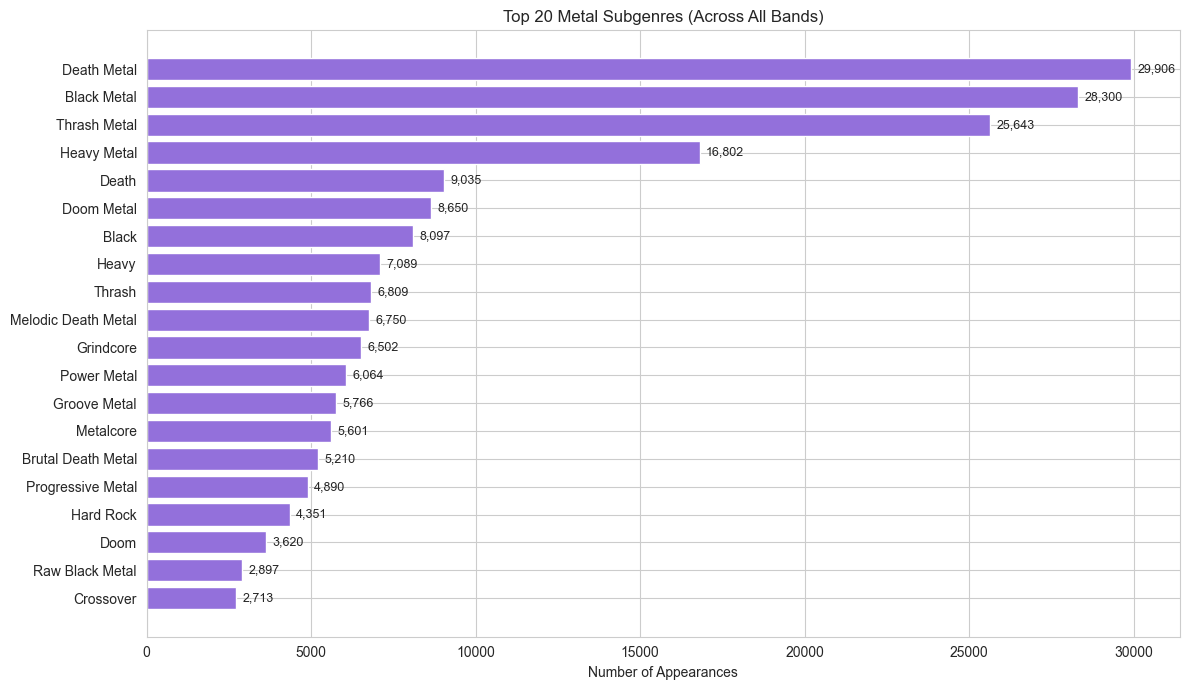

In [12]:
genre_counts = all_genres.value_counts().head(20)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(genre_counts.index[::-1], genre_counts.values[::-1], color="mediumpurple")
ax.set_xlabel("Number of Appearances")
ax.set_title("Top 20 Metal Subgenres (Across All Bands)")

for bar in bars:
    width = bar.get_width()
    ax.text(width + 200, bar.get_y() + bar.get_height()/2,
            f"{int(width):,}", va="center", fontsize=9)

plt.tight_layout()
plt.savefig("../outputs/top_20_genres.png", dpi=150, bbox_inches="tight")
plt.show()

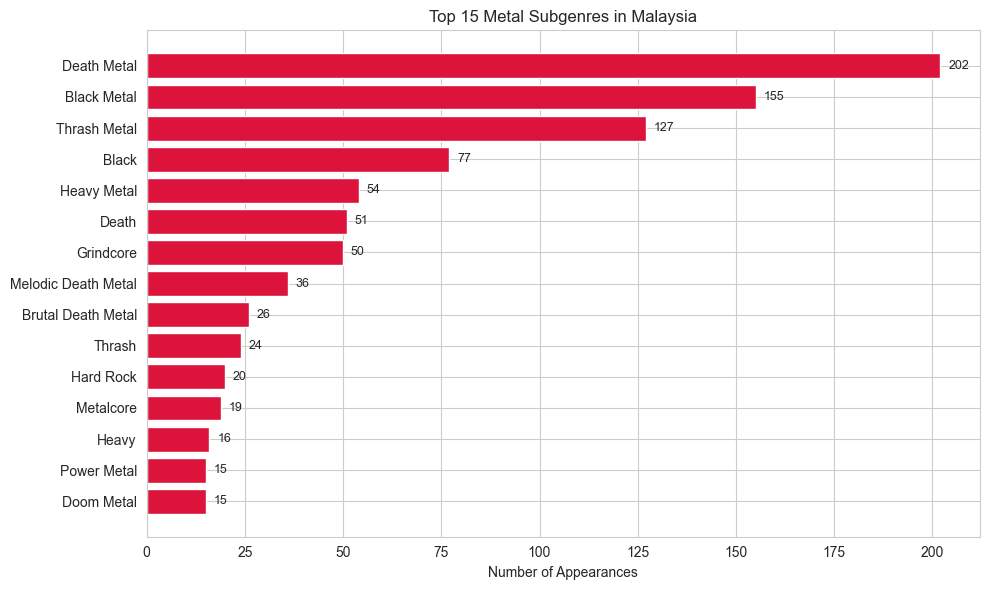

In [13]:
df_my = df[df["Country"] == "Malaysia"]
my_genres = df_my["Genre"].str.split("[/,]").explode().str.strip()
my_genres = my_genres.str.replace(r"\(.*?\)", "", regex=True).str.strip()
my_genres = my_genres[my_genres != ""]

my_genre_counts = my_genres.value_counts().head(15)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(my_genre_counts.index[::-1], my_genre_counts.values[::-1], color="crimson")
ax.set_xlabel("Number of Appearances")
ax.set_title("Top 15 Metal Subgenres in Malaysia")

for bar in bars:
    width = bar.get_width()
    ax.text(width + 2, bar.get_y() + bar.get_height()/2,
            f"{int(width)}", va="center", fontsize=9)

plt.tight_layout()
plt.savefig("../outputs/malaysia_genres.png", dpi=150, bbox_inches="tight")
plt.show()

## Band Status Analysis

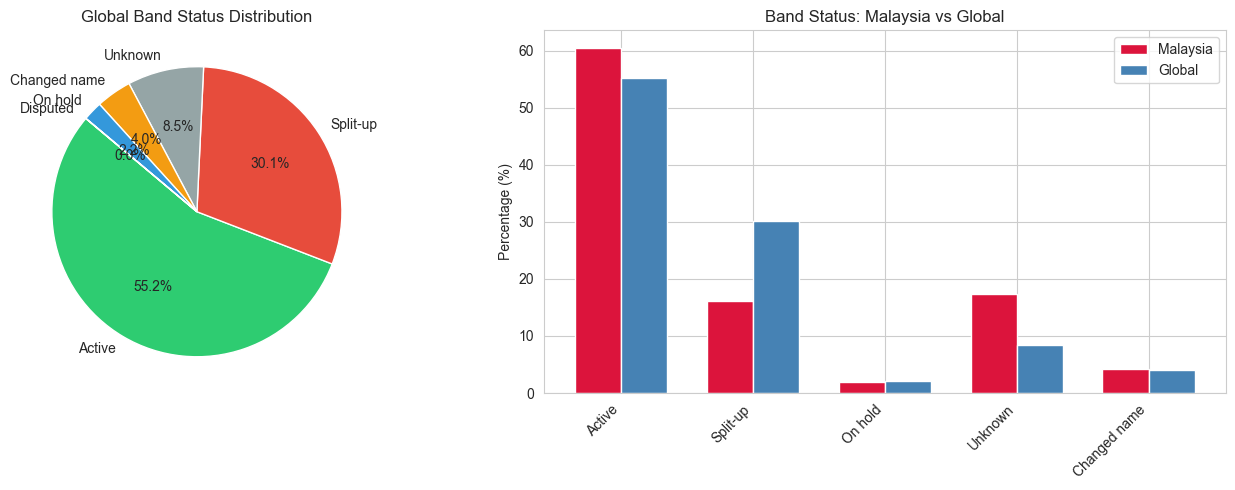

In [14]:
status_counts = df["Status"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Global pie chart
colors = ["#2ecc71", "#e74c3c", "#95a5a6", "#f39c12", "#3498db", "#9b59b6"]
axes[0].pie(status_counts.values, labels=status_counts.index, autopct="%1.1f%%",
            colors=colors, startangle=140)
axes[0].set_title("Global Band Status Distribution")

# Malaysia vs Global comparison
df_my = df[df["Country"] == "Malaysia"]
my_status = df_my["Status"].value_counts(normalize=True) * 100
global_status = df["Status"].value_counts(normalize=True) * 100

comparison = pd.DataFrame({"Malaysia": my_status, "Global": global_status}).fillna(0)
comparison = comparison.loc[["Active", "Split-up", "On hold", "Unknown", "Changed name"]]

x = range(len(comparison))
width = 0.35
axes[1].bar([i - width/2 for i in x], comparison["Malaysia"], width, label="Malaysia", color="crimson")
axes[1].bar([i + width/2 for i in x], comparison["Global"], width, label="Global", color="steelblue")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_title("Band Status: Malaysia vs Global")
axes[1].set_xticks(x)
axes[1].set_xticklabels(comparison.index, rotation=45, ha="right")
axes[1].legend()

plt.tight_layout()
plt.savefig("../outputs/band_status_analysis.png", dpi=150, bbox_inches="tight")
plt.show()

In [15]:
print("=== Dataset Summary ===")
print(f"Total bands analysed: {len(df):,}")
print(f"Countries represented: {df['Country'].nunique()}")
print(f"Most common genre globally: {all_genres.value_counts().index[0]}")
print(f"Most common genre in Malaysia: {my_genres.value_counts().index[0]}")
print(f"Malaysian bands: {len(df_my)} ({len(df_my)/len(df)*100:.2f}% of global)")
print(f"Active bands globally: {status_counts['Active']:,} ({status_counts['Active']/len(df)*100:.1f}%)")

=== Dataset Summary ===
Total bands analysed: 183,394
Countries represented: 157
Most common genre globally: Death Metal
Most common genre in Malaysia: Death Metal
Malaysian bands: 775 (0.42% of global)
Active bands globally: 101,316 (55.2%)
